# Initial Exploration
< DEPRECATED >

This notebook goes through each of the datasets we were considering with a high level glance.

   male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   80.0  25.34       75.0     70.0     0  
3   95.0  28.58       65.0    103.0     1  
4   84.0  23.10       85.0     85.0     0  


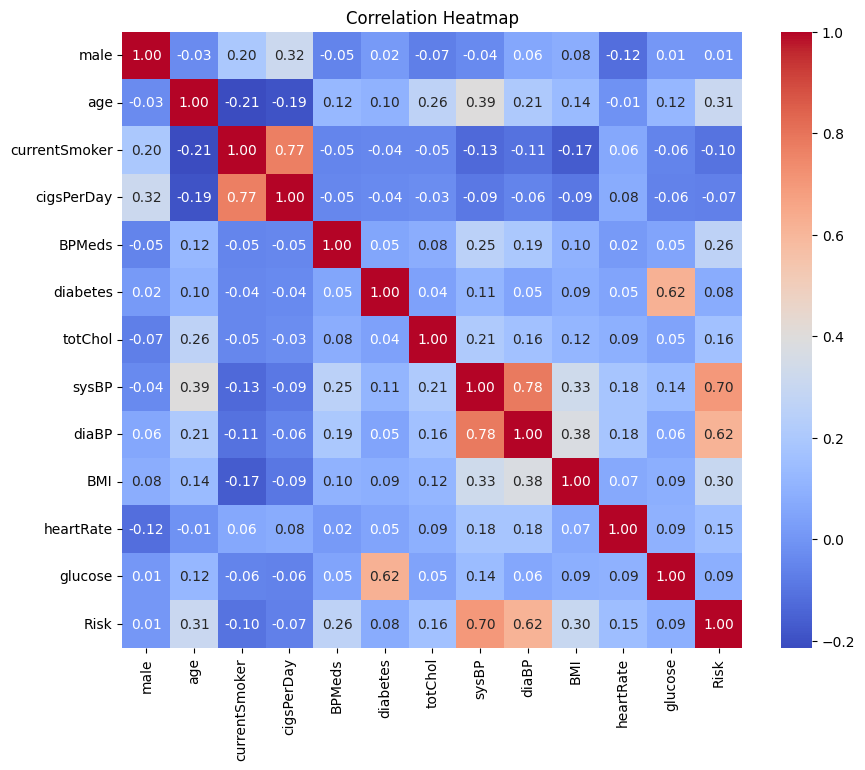

In [2]:
# HyperTension Risk Model: (Classification)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Hypertension-risk-model-main.csv")
print(df.head())
correlation_matrix = df.corr()
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [3]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numerical column
outliers_count = {}
for column in df.select_dtypes(include=['int64', 'float64']):
    outliers_count[column] = count_outliers(df[column])

# Print counts of outliers for each column
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in male: 0
Number of outliers in age: 0
Number of outliers in currentSmoker: 0
Number of outliers in cigsPerDay: 12
Number of outliers in BPMeds: 124
Number of outliers in diabetes: 109
Number of outliers in totChol: 56
Number of outliers in sysBP: 126
Number of outliers in diaBP: 77
Number of outliers in BMI: 97
Number of outliers in heartRate: 76
Number of outliers in glucose: 188
Number of outliers in Risk: 0


In [4]:
print(df.shape)

(4240, 13)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)
NEAR BAY

<1H OCEAN

INLAND

NEAR OCEAN

ISLAND

NEAR BAY: 0

<

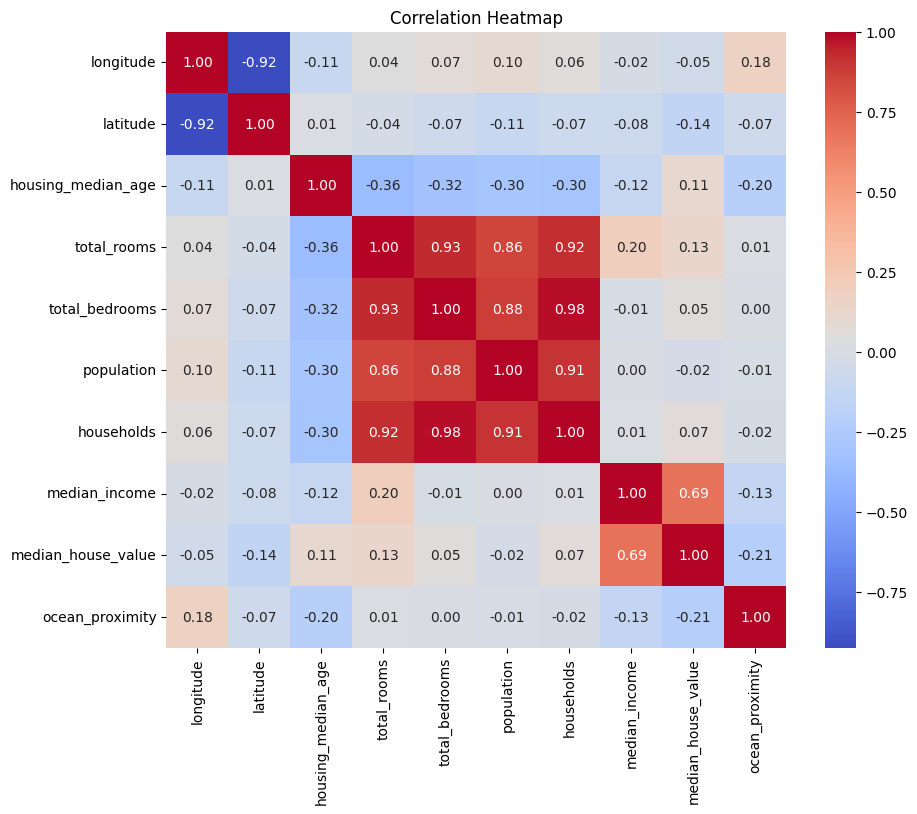

In [5]:
# House Price Dataset (Regression)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("housing.csv")
print(df.head())

print(df.shape)
unique_values = df['ocean_proximity'].unique()
for value in unique_values:
    print(f"{value}\n")
mapping_dict = {value: index for index, value in enumerate(unique_values)}

for index, value in mapping_dict.items():
    print(f'{index}: {value}\n')
df['ocean_proximity'] = df['ocean_proximity'].map(mapping_dict)
print(df.head())
correlation_matrix = df.corr()
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numerical column
outliers_count = {}
for column in df.select_dtypes(include=['int64', 'float64']):
    outliers_count[column] = count_outliers(df[column])

# Print counts of outliers for each column
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in longitude: 0
Number of outliers in latitude: 0
Number of outliers in housing_median_age: 0
Number of outliers in total_rooms: 1287
Number of outliers in total_bedrooms: 1271
Number of outliers in population: 1196
Number of outliers in households: 1220
Number of outliers in median_income: 681
Number of outliers in median_house_value: 1071
Number of outliers in ocean_proximity: 5


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

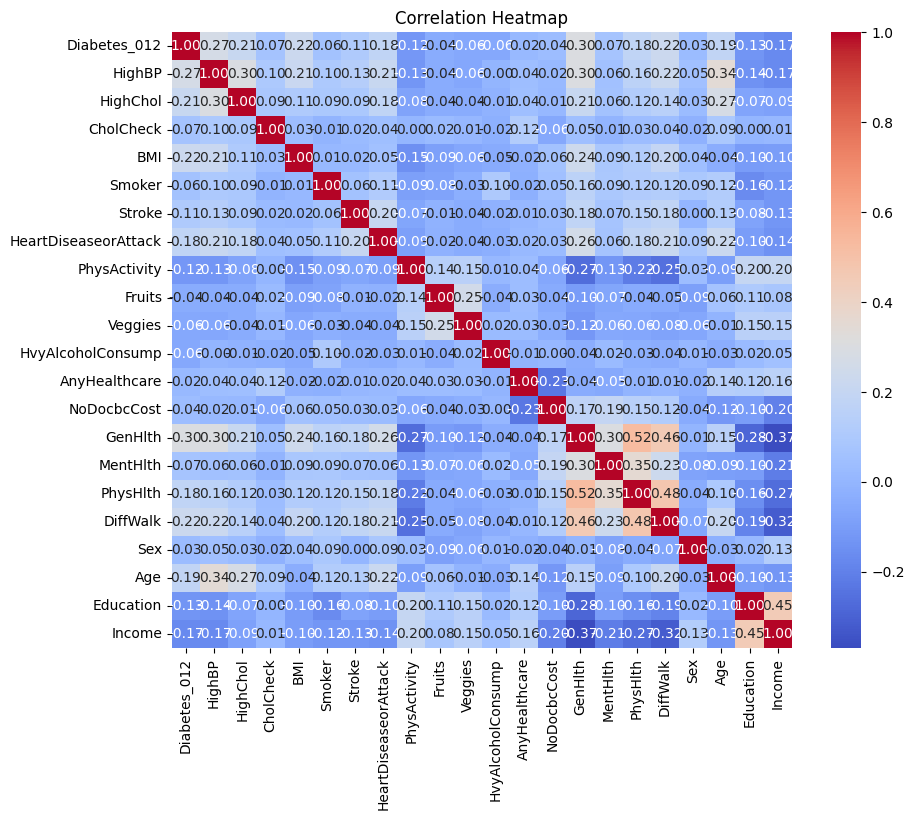

In [7]:
# Diabetes Model: (Classification)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
print(df.head())
correlation_matrix = df.corr()
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.shape[0]

# Count outliers for each numerical column
outliers_count = {}
for column in df.select_dtypes(include=['int64', 'float64']):
    outliers_count[column] = count_outliers(df[column])

# Print counts of outliers for each column
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in Diabetes_012: 39977
Number of outliers in HighBP: 0
Number of outliers in HighChol: 0
Number of outliers in CholCheck: 9470
Number of outliers in BMI: 9847
Number of outliers in Smoker: 0
Number of outliers in Stroke: 10292
Number of outliers in HeartDiseaseorAttack: 23893
Number of outliers in PhysActivity: 61760
Number of outliers in Fruits: 0
Number of outliers in Veggies: 47839
Number of outliers in HvyAlcoholConsump: 14256
Number of outliers in AnyHealthcare: 12417
Number of outliers in NoDocbcCost: 21354
Number of outliers in GenHlth: 12081
Number of outliers in MentHlth: 36208
Number of outliers in PhysHlth: 40949
Number of outliers in DiffWalk: 42675
Number of outliers in Sex: 0
Number of outliers in Age: 0
Number of outliers in Education: 0
Number of outliers in Income: 0
